# **Tugas Akhir Praktikum Sains Data** #

Raffi Ramadhya Alamsyah

NPM: 2106722700

Sains Data (A)

Dosen Pengajar: Dr. Bevina D. Handari

## **1. Clustering untuk mengelompokkon *Customer* berdasarkan Banyaknya Transaksi** ##
Diberikan dataset kampanye marketing.
Buatlah clustering untuk menyegmentasikan pelanggan menggunakan metode-metode
clustering yang telah di ajarkan di lab. Tentukan jumlah cluster terbaik, visualisasikan cluster
yang terbentuk, dan interpretasikan hasilnya, jangan lupa lakukan data cleaning dan
preprocessing jika diperlukan.

### **Data Preprocessing** ###

In [ ]:
# Import package-package yang relevan
import pandas as pd # Untuk read file excel/csv
import numpy as np
import matplotlib.pyplot as plt # Untuk membuat plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as sch # Untuk membuat cluster hirarki
from sklearn.cluster import AgglomerativeClustering # Untuk clustering aglomeratif
from sklearn.cluster import KMeans # Untuk clustering k-means
import sklearn.metrics as metrics # Untuk mengimport metrik-metrik yang meng-assess performance
from sklearn.metrics import classification_report # Untuk melihat hasil dari clustering
from sklearn.decomposition import PCA # Untuk reduksi dimensi jika perlu

In [ ]:
# Membaca file dataset excel
df = pd.read_excel('/content/marketing_campaign.xlsx')

In [ ]:
# Melihat dataset
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
# Melihat info lebih detail mengenai dataset
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04    

In [ ]:
# Melihat ringkasan statistik deskriptif untuk kolom-kolom numerik dalam dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Melihat ada kolom/fitur apa saja dalam dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Melihat tipe data setiap kolom
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
# Mengklasifikasi jenis observasi setiap fitur dan mendata jumlahnya masing-masing
unique_counts = df.nunique()

# Print hasilnya
print(unique_counts)# Mengklasifikasi jenis observasi setiap fitur dan mendata jumlahnya masing-masing

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [ ]:
# Melihat lebih jelas jenis observasi setiap fitur di dataset
for column in df.columns:
    print(column," : ")
    print(df[column].value_counts())

ID  : 
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64
Year_Birth  : 
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64
Education  : 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Marital_Stat

In [ ]:
# Menghitung jumlah masing-masing jenis observasi dalam fitur
for column in df.columns:
    if df[column].dtype == 'object':  # hanya menuunjukkan jenis fitur objek (categorical)
        print(df[column].value_counts())
        print()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



In [ ]:
# Melihat jumlah tipe data setiap fitur
df.dtypes.value_counts()

int64             25
object             2
float64            1
datetime64[ns]     1
dtype: int64

### **Data Cleaning** ###

In [ ]:
# Menghitung dan menghilangkan Missing Values setiap fitur
df.isna().sum()
df = df.dropna()

In [ ]:
# Menghitung apakah ada value yang sejenis di setiap fitur
df.duplicated().sum()

0

In [ ]:
# Menghitung jumlah kemunculan setiap nilai unik dalam kolom
df.value_counts()

ID     Year_Birth  Education   Marital_Status  Income   Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0      1985        Graduation  Married         70951.0  0        0         2013-05-04   66       239       10         554              254              87                54            1                  3                4                    9                  1                  0             0             0             0             0             0         3              11         0           1
7373   1952        PhD         Divorced        46610.0  0        2         2012-10-29   8        96        12         96               33               22                43            6                  4   

In [ ]:
# Assign kolom-kolom yang dipilih dari DataFrame df ke variabel X
X = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']].values
X

array([[635,  88, 546, ...,  10,   4,  58],
       [ 11,   1,   6, ...,   1,   2,  38],
       [426,  49, 127, ...,   2,  10,  26],
       ...,
       [908,  48, 217, ...,   3,  13,  91],
       [428,  30, 214, ...,   5,  10,   8],
       [ 84,   3,  61, ...,   1,   4,  40]])

### **K-Means Clustering** ###

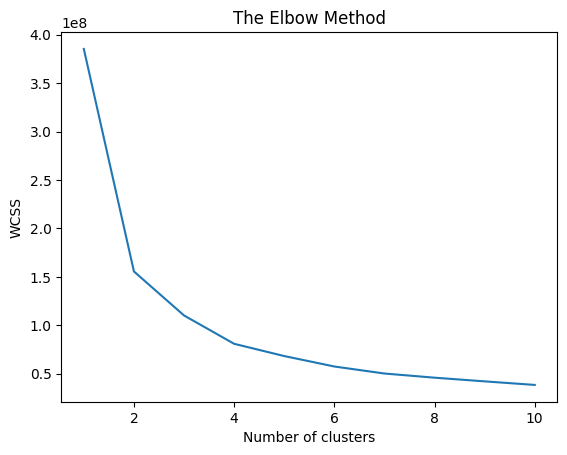

In [ ]:
# Implementasikan metode "The Elbow Method"
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Nilai Within-Cluster Sum of Squares (WCSS) untuk berbagai jumlah klaster.
wcss

[385220755.8984651,
 155594922.8606353,
 110178709.65128535,
 80939999.46609534,
 68291172.73225428,
 57504107.29652015,
 50260995.90726477,
 45968202.678377986,
 42166497.26392174,
 38499485.16723418]

In [ ]:
# Menentukan Silhoutte score
for i in range(2,11):
  labels=KMeans(n_clusters=i,random_state=200).fit(X).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.589778959375026
Silhouette score for k(clusters) = 3 is 0.5219089561100573
Silhouette score for k(clusters) = 4 is 0.5148252675237147
Silhouette score for k(clusters) = 5 is 0.4682920931844029
Silhouette score for k(clusters) = 6 is 0.46128966527314763
Silhouette score for k(clusters) = 7 is 0.458894578007963
Silhouette score for k(clusters) = 8 is 0.426927629535975
Silhouette score for k(clusters) = 9 is 0.45693172026557877
Silhouette score for k(clusters) = 10 is 0.4384842626642904


In [ ]:
# Proses K-Means
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

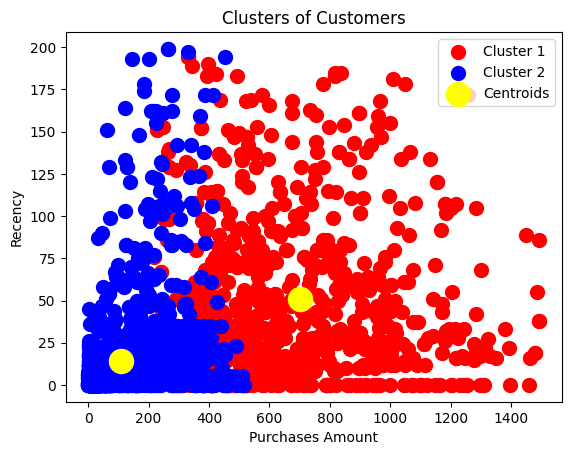

In [ ]:
# Plot hasil Clustering dari Metode K-Means nya
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Purchases Amount')
plt.ylabel('Recency')
plt.legend()
plt.show()

In [ ]:
# Melihat koordinat pusat dari setiap klaster
kmeans.cluster_centers_

array([[701.6395664 ,  50.78455285, 383.55420054,  73.90379404,
         52.8102981 ,  71.88346883,   2.1300813 ,   5.88753388,
          5.44715447,   8.52710027,  50.4498645 ],
       [107.08592693,  14.15832206,  58.86332882,  19.52909337,
         14.1556157 ,  30.02503383,   2.42016238,   3.18538566,
          1.28484438,   4.43978349,  48.29499323]])

In [ ]:
# Label klaster untuk setiap sampel dalam dataset
kmeans.labels_

array([0, 1, 1, ..., 0, 0, 1], dtype=int32)

Berdasarkan grafik tersebut, cluster yang berwarna biru dengan centroid berada diantara 0 dan 200 di sumbu x (*Purchases Amount*) dan diantara 0 dan 25 hari di sumbu y (*Recency*) menunjukkan bahwa cluster biru merupakan *customer* yang memiliki *purchases amount* yang tergolong lemah (0-600), tetapi kebanyakan dari mereka terakhir belanja 0-25 hari yang lalu, yang mungkin menunjukkan bahwa *customer* yang ada di cluster ini merupakan *low spender*, tetapi dengan *buying habit* yang sering.

Sedangkan untuk cluster berwarna merah, mereka tergolong merupakan *high spender*, tetapi waktu mereka terakhir belanja tergolong *varies* (macam-macam).

### **Hierarchical Clustering** ###

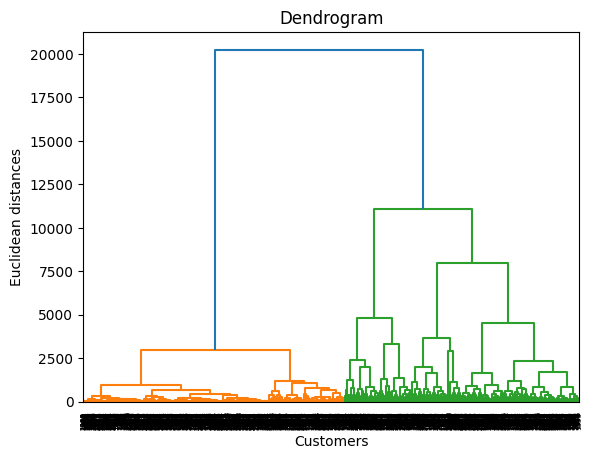

In [ ]:
# Membuat dendogram yang menunjukkan tingkatan/hirarki dari dataset "X"
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Melakukan Clustering Aglomeratif
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

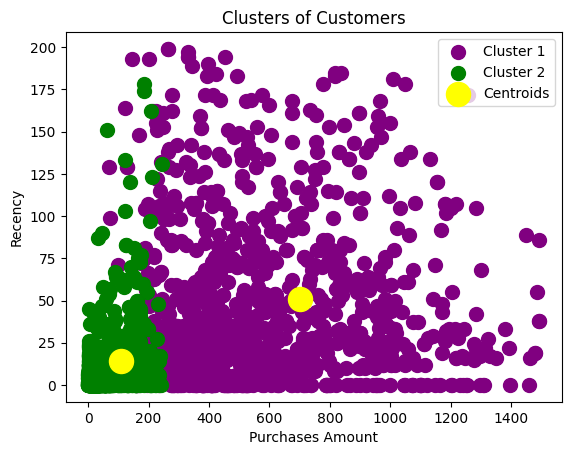

In [ ]:
# Plot Clusternya
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Purchases Amount')
plt.ylabel('Recency')
plt.legend()
plt.show()

Berdasarkan grafik tersebut, cluster yang berwarna biru dengan centroid berada diantara 0 dan 200 di sumbu x (*Purchases Amount*) dan diantara 0 dan 25 hari di sumbu y (*Recency*) menunjukkan bahwa cluster biru merupakan *customer* yang memiliki *purchases amount* yang tergolong sangat lemah (0-200), tetapi kebanyakan dari mereka terakhir belanja 0-50 hari yang lalu, yang mungkin menunjukkan bahwa *customer* yang ada di cluster ini merupakan *low spender*, tetapi dengan *buying habit* yang sering.

Sedangkan untuk cluster berwarna merah, mereka tergolong merupakan *mid-high spender*, tetapi waktu mereka terakhir belanja adalah 0-75 hari yang lalu.

## **2. Neural Network Sederhana yang Serupa dengan Regresi Logistik** ##
Buatlah neural network sederhana yang serupa dengan regresi logistik dengan menggunakan
Tensorflow (TANPA mengunakaan framework keras). Tentunya, sebelum dapat dibangun
model machine learningnya, kalian harus melakukan preprocessing data terlebih dahulu.

### **Data Preprocessing** ##

In [88]:
# Import package-package yang relevan
import pandas as pd # Untuk read file excel/csv
import numpy as np
import matplotlib.pyplot as plt # Untuk membuat plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import pickle
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset = pd.read_excel('/content/train (2).xlsx')

In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [ ]:
# Melihat info lebih detail mengenai dataset
dataset.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,1.271697e+05
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,4.112720e+05
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,1.445000e+01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,7.100000e+01
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,7.895800e+04
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,5.123292e+06


In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Mengklasifikasi jenis observasi setiap fitur dan mendata jumlahnya masing-masing
unique_counts = dataset.nunique()

# Print hasilnya
print(unique_counts)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           247
Cabin          147
Embarked         3
dtype: int64


In [ ]:
# Melihat lebih jelas jenis observasi setiap fitur di dataset
for column in dataset.columns:
    print(column," : ")
    print(dataset[column].value_counts())

PassengerId  : 
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
Survived  : 
0    549
1    342
Name: Survived, dtype: int64
Pclass  : 
3    491
1    216
2    184
Name: Pclass, dtype: int64
Name  : 
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
Sex  : 
male      577
female    314
Name: Sex, dtype: int64
Age  : 
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     

In [ ]:
# Menghitung jumlah masing-masing jenis observasi dalam fitur
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # hanya menuunjukkan jenis fitur objek (categorical)
        print(dataset[column].value_counts())
        print()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length:

In [ ]:
# Melihat jumlah tipe data setiap fitur
dataset.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

### **Data Cleaning** ###

In [ ]:
# Menghitung Missing Values setiap fitur
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
dataset.drop('Cabin', axis=1, inplace=True)

### **Imputasi Data** ###

In [ ]:
# Preprocessing data
dataset = dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})

# Menentukan fitur dan target
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [ ]:
# Menggunakan metode imputasi yang akan dievaluasi
imputation_methods = ['mean', 'median', 'most_frequent']

# Evaluasi metode imputasi dengan cross-validation
best_method = None
best_score = -np.inf

In [ ]:
for method in imputation_methods:
    # Mengisi missing values dengan metode imputasi yang ditentukan
    imputer = SimpleImputer(strategy=method)
    X_imputed = imputer.fit_transform(X)

    # Normalisasi fitur
    X_imputed = (X_imputed - np.mean(X_imputed, axis=0)) / np.std(X_imputed, axis=0)

    # Menentukan ukuran input dan output layer
    input_size = X_imputed.shape[1]
    output_size = 1

    # Membangun model
    X_input = tf.placeholder(tf.float32, shape=[None, input_size])
    y_input = tf.placeholder(tf.float32, shape=[None, output_size])

    # Menentukan parameter model
    W = tf.Variable(tf.random.normal([input_size, output_size]))
    b = tf.Variable(tf.random.normal([output_size]))

    # Definisi persamaan regresi logistik
    logits = tf.matmul(X_input, W) + b
    y_pred = tf.sigmoid(logits)

    # Definisi fungsi loss (binary cross entropy) dengan L2 regularization
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_input, logits=logits))
    reg_lambda = 0.01  # Parameter regulasi L2
    regularizer = tf.nn.l2_loss(W)  # L2 regularization
    loss = tf.reduce_mean(loss + reg_lambda * regularizer)

    # Definisi optimizer (gradient descent)
    learning_rate = 0.01
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Inisialisasi variabel
    init = tf.global_variables_initializer()

    # Menentukan jumlah epoch dan ukuran batch
    num_epochs = 100
    batch_size = 16

    # Menjalankan sesi TensorFlow
    with tf.Session() as sess:
        sess.run(init)

        # Training model
        for epoch in range(num_epochs):
            # Mendapatkan batch data secara acak
            indices = np.random.choice(len(X_imputed), batch_size)
            X_batch = X_imputed[indices]
            y_batch = np.expand_dims(y[indices], axis=1)

            # Menjalankan optimizer dan menghitung loss
            _, batch_loss = sess.run([optimizer, loss], feed_dict={X_input: X_batch, y_input: y_batch})

        # Menggunakan model yang dilatih untuk evaluasi dengan cross-validation
        logistic_model = LogisticRegression()
        logistic_model.fit(sess.run(y_pred, feed_dict={X_input: X_imputed}), y)
        scores = cross_val_score(logistic_model, X_imputed, y, cv=5)
        mean_score = np.mean(scores)

        # Memilih metode imputasi terbaik
        if mean_score > best_score:
            best_score = mean_score
            best_method = method

    print("Method:", method)
    print("Cross-validation scores:", scores)
    print("Mean score:", mean_score)
    print()

Method: mean
Cross-validation scores: [0.7877095  0.76966292 0.79775281 0.76966292 0.80898876]
Mean score: 0.7867553825874083

Method: median
Cross-validation scores: [0.79329609 0.76966292 0.79775281 0.76966292 0.81460674]
Mean score: 0.7889962965287804

Method: most_frequent
Cross-validation scores: [0.79329609 0.7752809  0.79775281 0.76404494 0.80898876]
Mean score: 0.7878727010231625



In [ ]:
# Imputasi dengan metode terbaik
imputer = SimpleImputer(strategy=best_method)
X_imputed = imputer.fit_transform(X)
X_imputed = (X_imputed - np.mean(X_imputed, axis=0)) / np.std(X_imputed, axis=0)

### **Membangun Model Regresi Logistik** ###

In [ ]:
# Menentukan ukuran input dan output layer
input_size = X_imputed.shape[1]
output_size = 1

# Membangun model
X_input = tf.placeholder(tf.float32, shape=[None, input_size])
y_input = tf.placeholder(tf.float32, shape=[None, output_size])

# Menentukan parameter model
W = tf.Variable(tf.random.normal([input_size, output_size]))
b = tf.Variable(tf.random.normal([output_size]))

In [ ]:
# Definisi persamaan regresi logistik
logits = tf.matmul(X_input, W) + b
y_pred = tf.sigmoid(logits)

# Definisi fungsi loss (binary cross entropy)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_input, logits=logits))

# Definisi optimizer (gradient descent)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [ ]:
# Inisialisasi variabel
init = tf.global_variables_initializer()

# Set random seed for reproducibility
tf.set_random_seed(42)
np.random.seed(42)

# Menentukan jumlah epoch dan ukuran batch
num_epochs = 100
batch_size = 16

# Menjalankan sesi TensorFlow
with tf.Session() as sess:
    sess.run(init)

    # Training model
    for epoch in range(num_epochs):
        # Mendapatkan batch data secara acak
        indices = np.random.choice(len(X_imputed), batch_size)
        X_batch = X_imputed[indices]
        y_batch = np.expand_dims(y[indices], axis=1)

        # Menjalankan optimizer dan menghitung loss
        _, batch_loss = sess.run([optimizer, loss], feed_dict={X_input: X_batch, y_input: y_batch})

        # Menampilkan loss tiap epoch
        if (epoch+1) % 10 == 0:
            print("Epoch:", epoch+1, "Loss:", batch_loss)

    # Evaluasi model
    y_pred_train = sess.run(y_pred, feed_dict={X_input: X_imputed})
    y_pred_train = (y_pred_train > 0.5).astype(int).flatten()
    accuracy = np.mean(y_pred_train == y)
    print("Accuracy:", accuracy)

Epoch: 10 Loss: 0.7075367
Epoch: 20 Loss: 1.0076919
Epoch: 30 Loss: 0.6874174
Epoch: 40 Loss: 1.0773551
Epoch: 50 Loss: 0.7616987
Epoch: 60 Loss: 0.35609317
Epoch: 70 Loss: 1.0916257
Epoch: 80 Loss: 0.85551375
Epoch: 90 Loss: 0.71934575
Epoch: 100 Loss: 0.719336
Accuracy: 0.531986531986532


In [ ]:
# Import model regresi logistik
import joblib
joblib.dump(logistic_model,'model_logreg.pkl')

['model_logreg.pkl']

In [ ]:
# Mengambil satu fitur dari X_imputed lalu mengubahnya menjadi array 2-dimensi
X_single_feature = X_imputed[:, 1]
X_single_feature_2d = X_single_feature[:, np.newaxis]

In [ ]:
# Load model dengan joblib.load
loaded_model = joblib.load('model_logreg.pkl')

# Membuat prediksi dengan data baru
predictions = loaded_model.predict(X_single_feature_2d)

# Print hasil prediksinya
print(predictions)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 

## **3. Deep Neural Network untuk Mengklasifikasi Lagu berdasarkan Emosi** ##
Buatlah deep neural network untuk melakukan proses klasifikasi, lakukan
hyperparameter tuning hingga didapat model yang terbaik. Lakukan analisis terhadap
accuracy, precision, recall dan f1-score nya (sebelum melakukan training model, jangan
lupa untuk melakukan data preprocessing).

In [126]:
!pip install optuna
!pip install xlrd
!pip install keras-tuner
!pip install pycaret
!pip install jinja2
!pip install xgboost
!pip install lightgbm
!pip install missingno
!pip install yellowbrick --user
!pip install catboost
!pip install pipdeptree
!pip install --upgrade pycaret
!pip install --upgrade threadpoolctl
!pip install --upgrade keras-tuner
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [133]:
# Import package-package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.metrics import log_loss

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import keras_tuner as kt
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

import tensorflow as tf
tf.config.run_functions_eagerly(True)

import joblib
import argparse
import pycaret

from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import math as mt
import missingno as msno

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import jinja2
import optuna

In [ ]:
# Memuat dataset dari file Excel
spotify = pd.read_excel('/content/Spotify Songs Emotion.xlsx')

In [ ]:
# Melihat dataset
spotify

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,284773,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,241307,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,234333,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


In [ ]:
# Melihat info lebih detail mengenai dataset
spotify.info

<bound method DataFrame.info of         duration (ms)  danceability  energy  loudness  speechiness  \
0              195000         0.611   0.614    -8.815       0.0672   
1              194641         0.638   0.781    -6.848       0.0285   
2              217573         0.560   0.810    -8.029       0.0872   
3              443478         0.525   0.699    -4.571       0.0353   
4              225862         0.367   0.771    -5.863       0.1060   
...               ...           ...     ...       ...          ...   
277933         276360         0.777   0.725    -9.012       0.0470   
277934         284773         0.543   0.482   -12.789       0.1940   
277935         241307         0.527   0.942    -5.640       0.0366   
277936         234333         0.768   0.829    -5.109       0.0313   
277937         241920         0.779   0.870   -13.141       0.0574   

        acousticness  instrumentalness  liveness  valence    tempo  \
0            0.01690          0.000794    0.7530    0.520

In [ ]:
# Melihat ringkasan statistik deskriptif untuk kolom-kolom numerik dalam dataset
spotify.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05,277938.000000
mean,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07,1.179101
std,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07,1.021033
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07,0.000000
50%,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07,1.000000
75%,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07,2.000000
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05,3.000000


In [ ]:
# Melihat ada kolom/fitur apa saja dalam dataset
spotify.columns

Index(['duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'spec_rate', 'labels'],
      dtype='object')

In [ ]:
# Melihat tipe data setiap kolom
spotify.dtypes

duration (ms)         int64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
spec_rate           float64
labels                int64
dtype: object

In [ ]:
# Mengklasifikasi jenis observasi setiap fitur dan mendata jumlahnya masing-masing
unique_counts = spotify.nunique()

# Print hasilnya
print(unique_counts)

duration (ms)       114072
danceability          1327
energy                2778
loudness             32201
speechiness           1640
acousticness          5177
instrumentalness      5402
liveness              1766
valence               1941
tempo                93680
spec_rate           271534
labels                   4
dtype: int64


In [ ]:
# Melihat lebih jelas jenis observasi setiap fitur di dataset
for column in spotify.columns:
    print(column," : ")
    print(spotify[column].value_counts())

duration (ms)  : 
192000    264
240000    227
180000    221
144000    162
120000    161
         ... 
645133      1
546027      1
357695      1
225756      1
269404      1
Name: duration (ms), Length: 114072, dtype: int64
danceability  : 
0.5650    636
0.6080    633
0.6330    624
0.5830    624
0.5940    618
         ... 
0.0569      1
0.0561      1
0.0572      1
0.0576      1
0.0581      1
Name: danceability, Length: 1327, dtype: int64
energy  : 
0.727000    438
0.932000    407
0.634000    403
0.931000    403
0.726000    397
           ... 
0.000639      1
0.001130      1
0.000020      1
0.000175      1
0.000999      1
Name: energy, Length: 2778, dtype: int64
loudness  : 
-6.640     48
-6.005     47
-6.903     47
-6.008     46
-6.472     46
           ..
-30.914     1
-40.238     1
-36.531     1
-31.862     1
-29.393     1
Name: loudness, Length: 32201, dtype: int64
speechiness  : 
0.0337    854
0.0362    841
0.0345    841
0.0336    829
0.0323    829
         ... 
0.7530      1
0.7320 

In [ ]:
# Menghitung jumlah masing-masing jenis observasi dalam fitur
for column in spotify.columns:
    if spotify[column].dtype == 'object':  # hanya menuunjukkan jenis fitur objek (categorical)
        print(spotify[column].value_counts())
        print()

In [ ]:
# Melihat jumlah tipe data setiap fitur
spotify.dtypes.value_counts()

float64    10
int64       2
dtype: int64

In [ ]:
# Menghitung Missing Values setiap fitur
spotify.isna().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64

In [ ]:
# Menghitung apakah ada value yang sejenis di setiap fitur
spotify.duplicated().sum()

1678

In [ ]:
# Melihat values yang terduplikasi
duplicates = spotify[spotify.duplicated()]
print(duplicates)

        duration (ms)  danceability  energy  loudness  speechiness  \
1357           168842         0.667   0.881    -3.366       0.0815   
2998           172196         0.802   0.820    -5.969       0.1460   
3065           170053         0.797   0.640    -6.272       0.1940   
5658           198865         0.172   0.128   -23.009       0.0345   
6245           224947         0.488   0.815    -4.354       0.0438   
...               ...           ...     ...       ...          ...   
277663         238640         0.558   0.470    -5.500       0.0316   
277770         280427         0.757   0.578    -3.886       0.0386   
277837         226547         0.812   0.388   -11.299       0.0430   
277889         289533         0.663   0.546    -5.234       0.0269   
277891         214573         0.537   0.355   -11.241       0.0363   

        acousticness  instrumentalness  liveness  valence    tempo  \
1357          0.3500          0.000000    0.0742   0.7110  104.968   
2998          0.057

In [ ]:
# Drop values yang terduplikasi
spotify.drop_duplicates(inplace=True)

In [ ]:
# Mengecek datasetnya kembali
spotify

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,284773,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,241307,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,234333,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


In [ ]:
# Menghitung apakah ada value yang sejenis di setiap fitur
spotify.duplicated().sum()

0

In [69]:
# Modul PyCaret untuk melakukan pra-pemrosesan data dan membangun model klasifikasi
from pycaret.classification import *
s = setup(data=spotify, target = 'labels', session_id = 345)

,Description,Value
0,Session id,345
1,Target,labels
2,Target type,Multiclass
3,Original data shape,"(276260, 12)"
4,Transformed data shape,"(276260, 12)"
5,Transformed train set shape,"(193382, 12)"
6,Transformed test set shape,"(82878, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [68]:
# Melihat model-model yang bisa digunakan untuk dataset dan hasil penggunaannya
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:36:56
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9657,0.9982,0.9657,0.9657,0.9657,0.9520,0.9520,132.5470
lightgbm,Light Gradient Boosting Machine,0.9598,0.9976,0.9598,0.9598,0.9597,0.9436,0.9436,9.6720
rf,Random Forest Classifier,0.9376,0.9940,0.9376,0.9377,0.9375,0.9124,0.9125,58.7860
gbc,Gradient Boosting Classifier,0.9287,0.9923,0.9287,0.9288,0.9286,0.9000,0.9001,238.5770
et,Extra Trees Classifier,0.9197,0.9903,0.9197,0.9202,0.9195,0.8871,0.8875,29.5480
dt,Decision Tree Classifier,0.8983,0.9272,0.8983,0.8983,0.8983,0.8576,0.8576,2.8260
ada,Ada Boost Classifier,0.8265,0.8888,0.8265,0.8311,0.8255,0.7608,0.7630,12.2730
lda,Linear Discriminant Analysis,0.8110,0.9490,0.8110,0.8158,0.8095,0.7335,0.7366,0.8090
qda,Quadratic Discriminant Analysis,0.7869,0.9407,0.7869,0.8012,0.7875,0.7069,0.7108,0.3230
ridge,Ridge Classifier,0.7662,0.0000,0.7662,0.7732,0.7611,0.6677,0.6740,0.2710


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [70]:
for column in spotify.columns:
    print(column," : ")
    print(spotify[column].value_counts())

duration (ms)  : 
192000    262
240000    226
180000    221
144000    161
120000    161
         ... 
145204      1
375285      1
319731      1
200988      1
269404      1
Name: duration (ms), Length: 114072, dtype: int64
danceability  : 
0.5650    633
0.6080    625
0.6330    620
0.5830    619
0.6290    614
         ... 
0.0561      1
0.9890      1
0.0572      1
0.0576      1
0.0581      1
Name: danceability, Length: 1327, dtype: int64
energy  : 
0.727000    433
0.932000    403
0.931000    399
0.634000    398
0.726000    397
           ... 
0.001020      1
0.001980      1
0.000767      1
0.000407      1
0.000999      1
Name: energy, Length: 2778, dtype: int64
loudness  : 
-6.640     48
-6.005     47
-6.903     46
-6.008     46
-6.472     46
           ..
-19.340     1
-48.049     1
-35.495     1
-26.220     1
-29.393     1
Name: loudness, Length: 32201, dtype: int64
speechiness  : 
0.0337    848
0.0362    834
0.0345    833
0.0336    825
0.0323    824
         ... 
0.6960      1
0.7630 

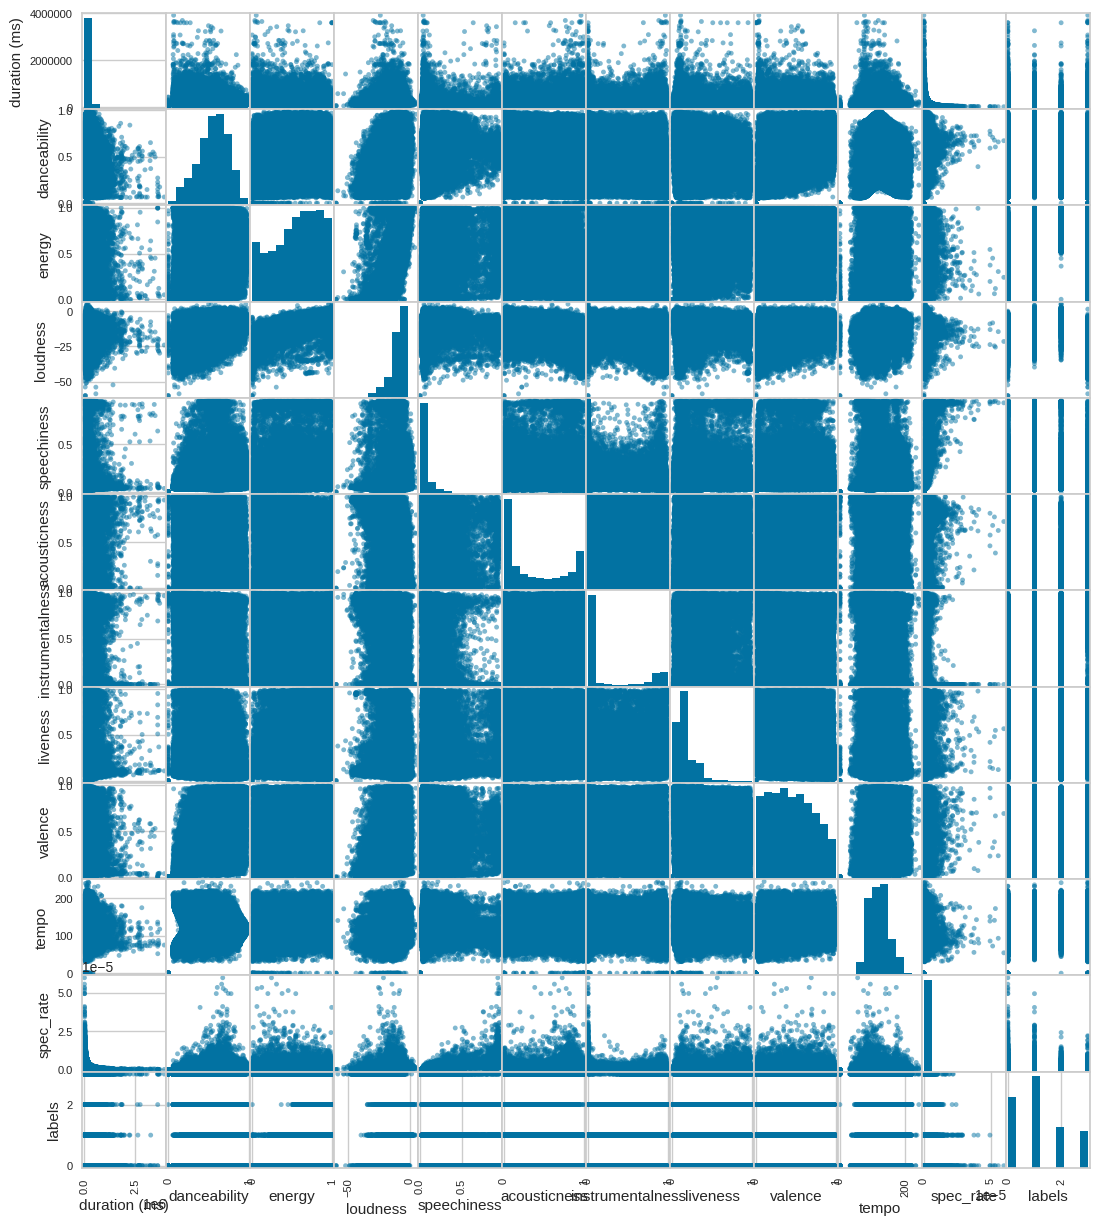

In [71]:
# Plot scatter matrix
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(spotify, figsize=(13,15))
plt.show()

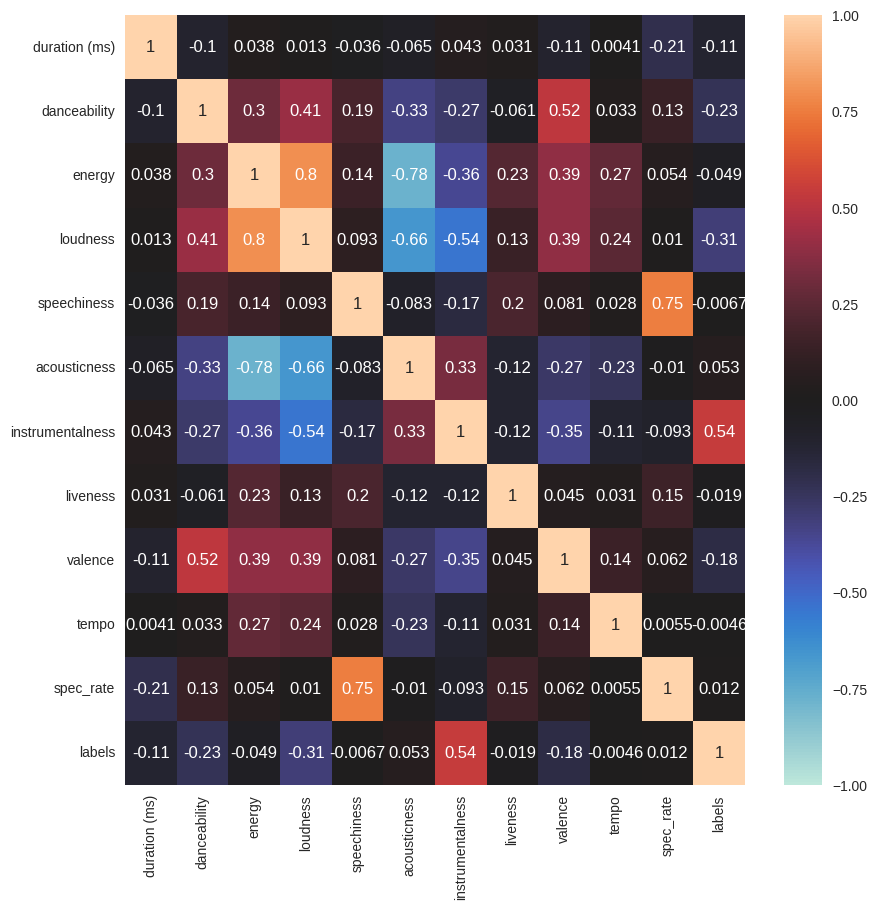

In [72]:
# Plot heatmap
import seaborn as sns

corr = spotify.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

In [73]:
# Split the dataset into features (X) and target variable (y)
X = spotify.drop('labels', axis=1)
y = spotify['labels']

In [74]:
# Mengonversi fitur-fitur kategorikal menjadi variabel dummy
X = pd.get_dummies(X)

In [75]:
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
0,195000,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07
1,194641,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07
2,217573,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07
3,443478,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08
4,225862,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07
...,...,...,...,...,...,...,...,...,...,...,...
277933,276360,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07
277934,284773,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07
277935,241307,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07
277936,234333,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07


In [77]:
y

array([2, 1, 1, ..., 2, 1, 1])

In [78]:
# Menamakan fungsi-fungsi yang nantinya akan dipakai supaya lebih mudah untuk memanggilnya
log_regr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Melakukan cross validation pada masing-masing metode
lr_score = cross_val_score(log_regr, X_train, y_train, cv=kfold, scoring='f1').mean()
svc_score = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='f1').mean()
dt_score = cross_val_score(dt, X_train, y_train, cv=kfold, scoring='f1').mean()
rf_score = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='f1').mean()

In [ ]:
# Melihat score masing-masing proses
for i in [lr_score, svc_score, dt_score, rf_score]:
    print(i)

In [79]:
# Kalkulasi matriks korelasi
corr_matrix = spotify.corr()

# Print matriks korelasi
print(corr_matrix)

                  duration (ms)  danceability    energy  loudness  \
duration (ms)          1.000000     -0.104592  0.037928  0.013029   
danceability          -0.104592      1.000000  0.303467  0.414370   
energy                 0.037928      0.303467  1.000000  0.802448   
loudness               0.013029      0.414370  0.802448  1.000000   
speechiness           -0.036169      0.191100  0.144818  0.092935   
acousticness          -0.064865     -0.329593 -0.779459 -0.662850   
instrumentalness       0.042792     -0.274585 -0.360942 -0.541214   
liveness               0.030746     -0.060786  0.234000  0.132946   
valence               -0.106463      0.521511  0.391235  0.392774   
tempo                  0.004055      0.032757  0.267508  0.244674   
spec_rate             -0.210239      0.134373  0.053914  0.010403   
labels                -0.114876     -0.229615 -0.048792 -0.309649   

                  speechiness  acousticness  instrumentalness  liveness  \
duration (ms)       -0.0361

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    reg_lambda=0.001,
    objective='multi:softmax',
    num_class=3
)

eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_pred_proba = model.predict_proba(X_test)
test_log_loss = log_loss(y_test, y_pred_proba)
print("Test Log Loss:", test_log_loss)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

[0]	validation_0-mlogloss:1.26823	validation_1-mlogloss:1.26843
[1]	validation_0-mlogloss:1.17090	validation_1-mlogloss:1.17116
[2]	validation_0-mlogloss:1.08807	validation_1-mlogloss:1.08836
[3]	validation_0-mlogloss:1.01761	validation_1-mlogloss:1.01813
[4]	validation_0-mlogloss:0.95519	validation_1-mlogloss:0.95575
[5]	validation_0-mlogloss:0.90088	validation_1-mlogloss:0.90151
[6]	validation_0-mlogloss:0.85296	validation_1-mlogloss:0.85374
[7]	validation_0-mlogloss:0.80830	validation_1-mlogloss:0.80902
[8]	validation_0-mlogloss:0.76957	validation_1-mlogloss:0.77039
[9]	validation_0-mlogloss:0.73282	validation_1-mlogloss:0.73380
[10]	validation_0-mlogloss:0.70119	validation_1-mlogloss:0.70236
[11]	validation_0-mlogloss:0.67196	validation_1-mlogloss:0.67300
[12]	validation_0-mlogloss:0.64442	validation_1-mlogloss:0.64555
[13]	validation_0-mlogloss:0.62001	validation_1-mlogloss:0.62113
[14]	validation_0-mlogloss:0.59764	validation_1-mlogloss:0.59878
[15]	validation_0-mlogloss:0.57714	

In [134]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

model = xgb.train(params, dtrain, num_boost_round=10)

train_pred = model.predict(dtrain)
test_pred = model.predict(dtest)

loss = []
val_loss = []
for i in range(10):
    loss.append(mean_squared_error(y_train, train_pred[:i+1]))
    val_loss.append(mean_squared_error(y_test, test_pred[:i+1]))

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(epochs, loss)
ax[0].plot(epochs, val_loss)
ax[0].legend(['loss', 'val_loss'], loc='upper right')
ax[0].set_title('Train Loss vs Val Loss')


plt.show()

ValueError: ignored

In [154]:
def build_model_reg(hp):
    model = tf.keras.Sequential() # Membuat objek Sequential
    n_hid_layers = hp.Int('n_hid_layers', 1, 2) # menghasilkan sebuah integer sebagai jumlah lapisan tersembunyi
    for layer in range(n_hid_layers): # Melakukan iterasi sebanyak n_hid_layers untuk menambahkan lapisan-lapisan tersembunyi ke dalam model
        n_neurons = hp.Int(f'nneurons{layer}', 32, 128, step=16)
        act = hp.Choice(f'activation_{layer}',
                        ['relu', 'linear', 'sigmoid'])
        if layer ==0:
             model.add(tf.keras.layers.Dense(n_neurons, activation=act,input_shape=(X.shape[1],)))
        else:
              model.add(tf.keras.layers.Dense(n_neurons, activation=act))

    # Menambahkan lapisan output, Fungsi aktivasi dipilih dari pilihan 'relu' atau 'linear'.
    act_output = hp.Choice('activation_output', ['relu', 'linear'])
    model.add(tf.keras.layers.Dense(1, activation=act_output))

    lr = hp.Float('learning_rate', 1e-5, 1e-2) # menghasilkan sebuah nilai float sebagai learning rate
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=lr) # Menggunakan optimizer Adam dengan learning rate yang dihasilkan dari
    model.compile(optimizer=opt, loss='mse') # Mengkompilasi model dengan optimizer dan loss function yang telah ditentukan
    model.run_eagerly = True
    return model # Mengembalikan model yang telah dibangun

In [155]:
# Menciptakan sebuah tuner dengan menggunakan BayesianOptimization sebagai metode pencarian hyperparameter.
tf.keras.backend.clear_session()

tuner = kt.BayesianOptimization(hypermodel=build_model_reg,
                                objective='val_loss',
                                max_trials=10,
                                directory='tuner_dir_0',
                                project_name='tune_housing_model')

tuner.search_space_summary()

Search space summary
Default search space size: 7
n_hid_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
n_neurons_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'linear', 'sigmoid'], 'ordered': False}
activation_output (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'linear'], 'ordered': False}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}
n_neurons_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'linear', 'sigmoid'], 'ordered': False}


In [156]:
# Menjalankan proses pencarian hyperparameter menggunakan tuner yang telah dibuat sebelumnya
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256)

In [157]:
# Melihat 3 hasil model hyperparameter dengan tuner terbaik
tuner.results_summary(3)

Results summary
Results in tuner_dir_0/tune_housing_model
Showing 3 best trials
Objective(name="val_loss", direction="min")

Trial 05 summary
Hyperparameters:
n_hid_layers: 1
n_neurons_0: 48
activation_0: relu
activation_output: relu
learning_rate: 0.00600295867003529
n_neurons_1: 96
activation_1: linear

Trial 00 summary
Hyperparameters:
n_hid_layers: 1
n_neurons_0: 80
activation_0: sigmoid
activation_output: linear
learning_rate: 0.0012251106293946507
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(

In [158]:
# Menggunakan hyperparamater dengan tuner terbaik untuk membangun model
# dan melihat ringkasan dari struktur/arsitektur model
model=tuner.get_best_models()[0]
model.summary()

NotFoundError: ignored

In [159]:
# Melakukan pelatihan model dengan menggunakan fitur Early Stopping untuk
# untuk menghentikan pelatihan jika tidak ada peningkatan dalam metrik validasi (val_loss)
# selama beberapa epoch yang ditentukan.
tf.config.run_functions_eagerly(True)

early_stop = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                              restore_best_weights=True,
                                              verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=500, batch_size=256, callbacks=[early_stop])

ValueError: ignored

In [142]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'reg_lambda': [0.001, 0.01, 0.1]
}

grid = GridSearchCV(estimator=XGBClassifier(objective='multi:softmax', num_class=3),
                    param_grid=param_grid,
                    scoring='f1',
                    cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_

KeyboardInterrupt: ignored

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10),
    }

    model = XGBClassifier(**params)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Define the KFold cross-validator
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring=make_scorer(f1_score)).mean()
    return score

# Perform hyperparameter tuning with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)